In [1]:
from torch import nn
from torch.utils.data import DataLoader, RandomSampler
from torchvision import datasets, transforms

import torchvision.transforms.functional as TF
import random
batch_size = 64

In [2]:
dataset = datasets.CIFAR10("./cifar10", download=True, transform=transforms.ToTensor(), train=False)

Files already downloaded and verified


In [48]:
import torchvision.transforms.functional as TF
import random
def my_segmentation_transforms(image):
    transform_type = random.randint(1, 4)
    if transform_type == 1:
        angle = random.randint(-30, 30)
        image = TF.rotate(image, angle)
    elif transform_type == 2:
        image = TF.hflip(image)
    elif transform_type == 3:
        image = TF.gaussian_blur(image, (3,3), (1.5, 1.5))
    elif transform_type == 4:
        image = TF.equalize(image)
    return TF.to_tensor(image)

In [49]:
dataset_transformed = datasets.CIFAR10("./cifar10-trans", download=True, transform=my_segmentation_transforms, train=False)

Files already downloaded and verified


In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"        # bez tego wysadza kernel kiedy rysuje obrazek

In [7]:
import torch
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader, RandomSampler
from torchvision import datasets, transforms

from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.metrics.confusion_matrix import ConfusionMatrix
from ignite.handlers import EarlyStopping

In [8]:
def print_img(img, axs):
    img_np = img.numpy()
    img_denormalized = (img_np*255).astype("uint8").transpose(1, 2, 0) 
    return axs.imshow(img_denormalized)

In [9]:
classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

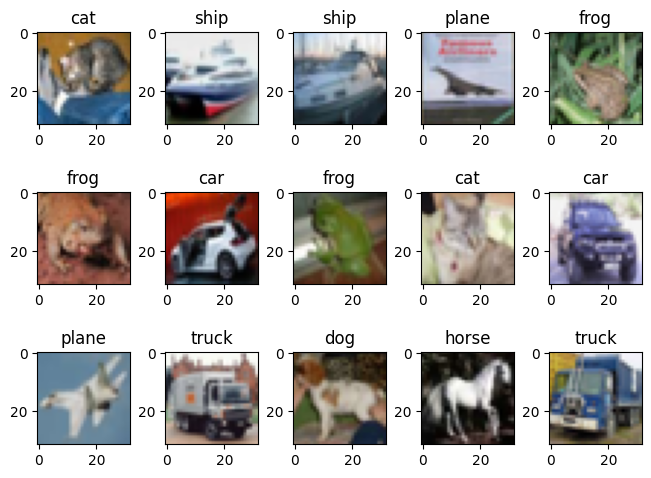

In [10]:
fig, axs = plt.subplots(3, 5, constrained_layout=True)
axs = np.reshape(axs, -1)
for x in range(15):
    img, label = dataset[x]
    axs[x].title.set_text(classes[label])
    print_img(img, axs[x])

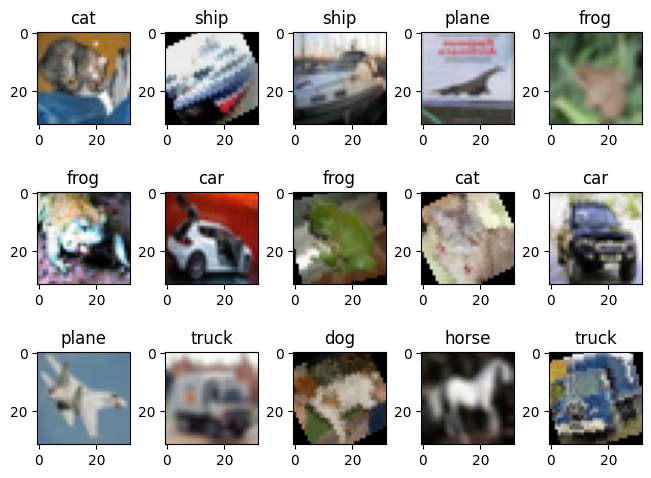

In [50]:
fig, axs = plt.subplots(3, 5, constrained_layout=True)
axs = np.reshape(axs, -1)
for x in range(15):
    img, label = dataset_transformed[x]
    axs[x].title.set_text(classes[label])
    print_img(img, axs[x])

In [20]:
increased_dataset = torch.utils.data.ConcatDataset([dataset,dataset_transformed])

In [21]:
len(increased_dataset)

20000